In [1]:
import os

import numpy as np
import importlib
import seaborn as sns
import gymnasium as gym
import matplotlib.pyplot as plt

import gym_env
from models import LinearRL
from utils import get_full_maze_values, policy_reval, decision_policy, update_terminal_reward
from utils_render import plot_decision_prob

In [2]:
# Set the random seed for NumPy
seed = 24
np.random.seed(seed)

# Save dir
save_dir = os.path.join('..', 'figures/')

In [3]:
# For plotting
idx = 0    # 7x7 maze
# idx = 28   # 10x10 maze
prob_locs = [1, 7]   # 7x7 maze
# prob_locs = [23, 34]   # 10x10 maze
# colors = [3, 2]
colors = [4, 9]

## Train Agents

In [4]:
mazes = ["simple-5x5-2", "simple-7x7-2", "maze-10x10-two-goal"]
maze_name = mazes[1]

### D_inv agent

In [53]:
# Agent to be used with D_inv
agent = LinearRL(env_name=maze_name)
# Make the reward for the first terminal state higher than the second to bias the DR towards that terminal state
update_terminal_reward(agent, loc=0, r=8)
# update_terminal_reward(agent, loc=1, r=8)

agent.DR = agent.gamma * agent.get_D_inv()
agent.update_V()
maze_values = get_full_maze_values(agent)

In [54]:
agent.maze

array([['S', '0', '0', '0', '0', '0', '0'],
       ['0', '1', '1', '0', '0', '0', '0'],
       ['0', '1', '1', '1', '0', 'G', '0'],
       ['0', '0', '1', '1', '1', '0', '0'],
       ['0', '0', '0', '0', '1', '0', '0'],
       ['0', '0', '0', '0', '0', '0', '0'],
       ['0', '0', '0', 'G', '0', '0', '0']], dtype='<U21')

In [55]:
pii_old_inv = decision_policy(agent, agent.Z)

In [60]:
# Update the second terminal state to make it double that of the first
update_terminal_reward(agent, loc=1, r=14)
V_new, Z_new = policy_reval(agent=agent)

In [61]:
agent.V = V_new
maze_values = get_full_maze_values(agent)

In [62]:
agent.update_V()
pii_new_inv = decision_policy(agent, Z_new)

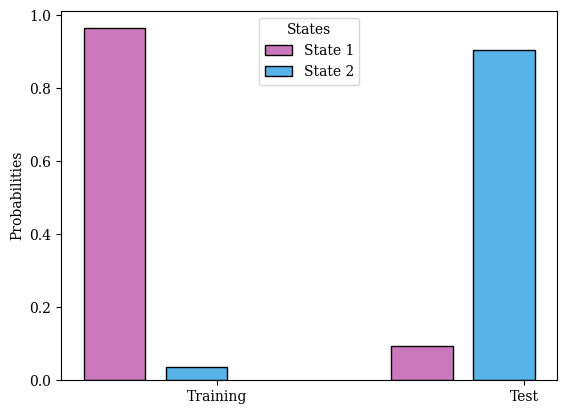

In [63]:
save_path = save_dir + 'policy_reval_10x10_inv.png'
plot_decision_prob(probs_train=pii_old_inv[idx][prob_locs], probs_test=pii_new_inv[idx][prob_locs], colors=colors, leg_loc="upper center", save_path=None)

### Agent with importance sampling

In [229]:
# Initialize the agent
# agent_with_imp = LinearRL(env_name=maze_name, _lambda=1, alpha=0.01, beta=1, num_steps=200000, policy="softmax", imp_samp=True)
# update_terminal_reward(agent_with_imp, loc=0, r=8)
agent_with_imp = LinearRL(env_name=maze_name, _lambda=1, alpha=0.2, beta=1, num_steps=10000, policy="softmax", imp_samp=True)
update_terminal_reward(agent_with_imp, loc=0, r=10)
update_terminal_reward(agent_with_imp, loc=1, r=8)

In [230]:
# Train the agent with importance sampling
agent_with_imp.learn(seed=seed)

In [231]:
# Print out the values to see what it learned
maze_values = get_full_maze_values(agent_with_imp)

In [232]:
update_terminal_reward(agent_with_imp, loc=1, r=16)
V_new, Z_new = policy_reval(agent=agent_with_imp)

In [233]:
agent_with_imp.V = V_new
maze_values = get_full_maze_values(agent_with_imp)

In [234]:
pii_old_with = decision_policy(agent_with_imp, agent_with_imp.Z)

In [235]:
agent_with_imp.update_V()
pii_new_with = decision_policy(agent_with_imp, Z_new)

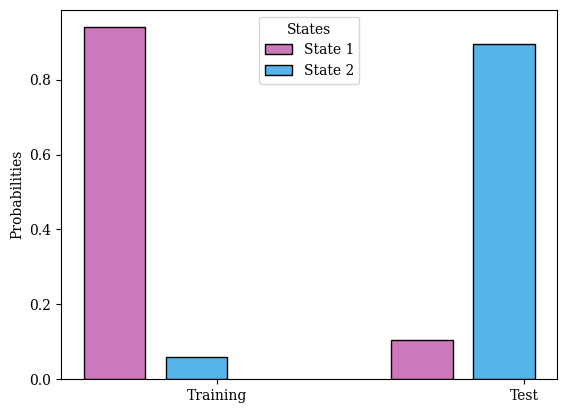

In [236]:
save_path = save_dir + 'reward_reval_7x7_with_is.png'
plot_decision_prob(probs_train=pii_old_with[idx][prob_locs], probs_test=pii_new_with[idx][prob_locs], colors=colors, leg_loc='upper center', save_path=None)

### Agent without importance sampling

In [165]:
# agent_no_imp = LinearRL(env_name=maze_name, _lambda=1, alpha=0.01, beta=1, num_steps=200000, policy="softmax", imp_samp=False)
# update_terminal_reward(agent_no_imp, loc=0, r=8)
agent_no_imp = LinearRL(env_name=maze_name, _lambda=1, alpha=0.2, beta=0.8, num_steps=20000, policy="softmax", imp_samp=False)
update_terminal_reward(agent_no_imp, loc=0, r=8)
# update_terminal_reward(agent_no_imp, loc=1, r=8)

In [166]:
# Train agent without importance sampling
agent_no_imp.learn(seed=seed)

In [167]:
# Print out the values to see what it learned
maze_values = get_full_maze_values(agent_no_imp)

In [168]:
update_terminal_reward(agent_no_imp, loc=1, r=12)
V_new, Z_new = policy_reval(agent=agent_no_imp)

In [169]:
agent_no_imp.V = V_new
maze_values = get_full_maze_values(agent_no_imp)

In [170]:
pii_old_without = decision_policy(agent_no_imp, agent_no_imp.Z)

In [171]:
agent_no_imp.update_V()
pii_new_without = decision_policy(agent_no_imp, Z_new)

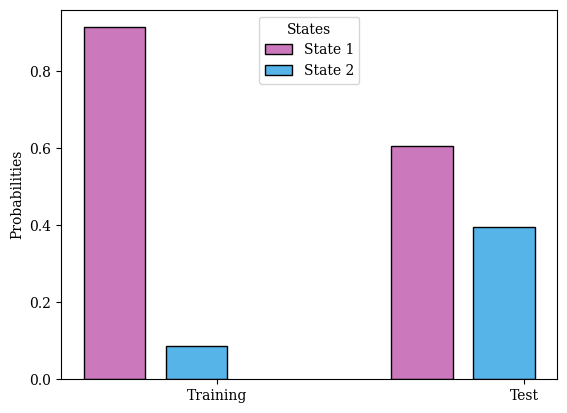

In [172]:
save_path = save_dir + 'reward_reval_7x7_without_is.png'
plot_decision_prob(probs_train=pii_old_without[idx][prob_locs], probs_test=pii_new_without[idx][prob_locs], colors=colors, leg_loc='upper center', save_path=None)